# Data Structures and Algorithms in Python - Exercises (Part 2)

- Link to student companion: https://bcs.wiley.com/he-bcs/Books?action=index&bcsId=8029&itemId=1118290275
- Some solutions to exercises: https://github.com/wdlcameron/Solutions-to-Data-Structures-and-Algorithms-in-Python
- More solutions (good ones!): https://github.com/ekeleshian/data_structures_and_algorithms/blob/master/object_oriented_programming.py

### C-2.24

Suppose you are on the design team for a new e-book reader. What are the primary classes and methods that the Python software for your reader will need? You should include an inheritance diagram for this code, but you do not need to write any actual code. Your software architecture should at least include ways for customers to buy new books, view their list of purchased books, and read their purchased books.

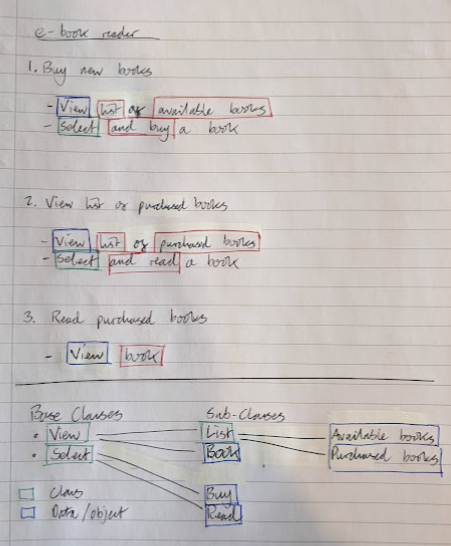

### C-2.25

Exercise R-2.12 uses the `__mul__` method to support multiplying a Vector by a number, while Exercise R-2.14 uses the `__mul__` method to support computing a dot product of two vectors. Give a single implementation of `Vector.__mul__` that uses run-time type checking to support both syntaxes `u * v` and `u * k`, where `u` and `v` designate vector instances and `k` represents a number.

In [ ]:
  # R-2.12
    def __mul__(self, other):
    """Return mutiple of vector with scalar."""
    if not isinstance(other,(int,float)):
        raise TypeError('Can only multiply THIS vector with int or float')
    else:
        result = Vector(len(self))           # start with vector of zeros
        for j in range(len(self)):
            result[j] = self[j] * other
        return result

In [ ]:
  # R-2.14
    def __mul__(self, other):
    """Return dot product of two vectors."""
    if len(self) != len(other):          # relies on __len__ method
      raise ValueError('dimensions must agree')
    
    result = 0
    
    for j in range(len(self)):
      result += self[j] * other[j]
    return result

In [ ]:
    def __mul__(self, other):
        '''Return mutiple of vector with scalar (u * k)
        or dot product of two vectors (u * v), depending on parameters'''
        
        if isinstance(other, (int,float)):       # other is a scalar
            result = Vector(len(self))           # start with vector of zeros
            for j in range(len(self)):
                result[j] = self[j] * other
            return result
        
        elif isinstance(other, (collections.Sequence, Vector)): # other is a sequence of some sort
            if len(self) != len(other):          # relies on __len__ method
                raise ValueError('dimensions must agree')
            
            result = 0
    
            for j in range(len(self)):
                result += self[j] * other[j]
            return result
        else:
            raise TypeError("Don't know what to do with you")

### C-2.26

The `SequenceIterator` class of Section 2.3.4 provides what is known as a forward iterator. Implement a class named `ReversedSequenceIterator` that serves as a reverse iterator for any Python sequence type. The ﬁrst call to `next` should return the last element of the sequence, the second call to `next` should return the second-to-last element, and so forth.

In [248]:
class ReverseSequenceIterator:
    '''An iterator for any of Python's sequence types.'''
    
    def __init__(self, sequence):
        '''Create an iterator for the given sequence.'''
        self._seq = sequence # keep a reference to the underlying data
        self._k = len(self._seq) # will decrement to last index on ﬁrst call to next
                                 # remember len(self._seq) = n-1 where n is number of elements

    def __next__(self):
        '''Return the next element, or else raise StopIteration error.'''
        self._k -= 1 # advance to previous index
        if self._k < len(self._seq):
        #if self._k >= 0:
            return(self._seq[self._k]) # return the data element
        
        raise StopIteration("You've exhausted me!")

    def __iter__(self):
        '''By convention, an iterator must return itself as an iterator.'''
        return self

seq = ReverseSequenceIterator([1,2,3])
next(seq), next(seq), next(seq), next(seq), next(seq), next(seq), next(seq)

IndexError: list index out of range

In my first attempt, I didn't change the if statement, and I didn't notice a problem because in my test I only ran `next()` 3 times (which matches the number of elements in the sequence). However, if I had run next a few times more, I would have seen an IndexError "list index out of range" error as a reference to `self._seq[-4]` was being made, which doesn't exist.

### C-2.27

In Section 2.3.5, we note that our version of the `Range` class has implicit support for iteration, due to its explicit support of both `__len__` and `__getitem__`. The class also receives implicit support of the Boolean test, “`k in r`” for `Range` `r`. This test is evaluated based on a forward iteration through the range, as evidenced by the relative quickness of the test `2 in Range(10000000)` versus `9999999 in Range(10000000)`.

Provide a more efﬁcient implementation of the contains method to determine whether a particular value lies within a given range. The running time of your method should be independent of the length of the range.

In [56]:
class Range:
    '''A class that mimics the built-in range class.'''
    
    def __init__(self, start, stop=None, step=1):
        '''Initialize a Range instance.
        
        Semantics is similar to built-in range class.'''
        
        if step == 0:
            raise ValueError("step cannot be 0")
            
        if stop is None: # special case of range(n)
            start, stop = 0, start # should be treated as if range(0,n)
        
        # calculate the eﬀective length once
        self._length = max(0, (stop - start + step - 1) // step)
        
        # need knowledge of start and step (but not stop) to support __getitem__
        self._start = start
        self._step = step
    
    def __len__(self):
        '''Return number of entries in the range.'''
        return self._length # We calculated this during __init__!
    
    def __getitem__(self, k):
        '''Return entry at index k (using standard interpretation if negative.'''
        if k < 0:
            k += len(self) # attempt to convert negative index
            
        if not 0 <= k < self._length:
            raise IndexError('index out of range')
        
        return self._start + k * self._step

rng = Range(-10,10,1)
list(rng)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [50]:
%%timeit
12 in rng

4.61 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [72]:
class RangeFastIn(Range):
    '''A class that mimics the built-in range class.
    Improved __contains__ function member.'''
    
    def __init__(self, start, stop=None, step=1):
        super().__init__(start, stop, step)

    def __contains__(self, val):
            if self._start <= val < (self._start + self._length):
                return True
            else:
                return False

rng = RangeFastIn(-10,10)
list(rng)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [73]:
%%timeit
12 in rng

171 ns ± 0.815 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [74]:
%%timeit
8 in rng

171 ns ± 0.549 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


1 ns = 1000 µs. Therefore our change has resulted in (4.87 * 1000) / 165 = 29.5-fold increase in speed

> __In my answer above, I followed literally the requirement "determine whether a particular value lies within a given range". My solution does identify whether the value lies in the range, but it does not identify whether the value actually is an element of the `RangeFastIn` object.__

In [75]:
# Correction

class RangeFastIn2(Range):
    '''A class that mimics the built-in range class.
    Improved __contains__ function member.'''
    
    def __init__(self, start, stop=None, step=1):
        super().__init__(start, stop, step)

    def __contains__(self, val):
            if self._start <= val < (self._start + self._length):
                if val % self._step == 0:
                    return True
            else:
                return False

rng = RangeFastIn(-10,10)
list(rng)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [76]:
%%timeit
12 in rng

172 ns ± 0.566 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [77]:
%%timeit
8 in rng

174 ns ± 1.56 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Here we can see the second timed loop takes fractionally longer to run than the first effort because of the additional logic comparison effort required to ascertain whether the `step` divides the value.

### C-2.28

The `PredatoryCreditCard` class of Section 2.4.1 provides a `process_month` method that models the completion of a monthly cycle. Modify the class so that once a customer has made ten calls to `charge` in the current month, each additional call to that function results in an additional $1 surcharge.

The complete `CreditCard` class:

In [106]:
class CreditCard:
    """A consumer credit card."""
  
    def __init__(self, customer, bank, acnt, limit):
        """Create a new credit card instance.

        The initial balance is zero.

        customer  the name of the customer (e.g., 'John Bowman')
        bank      the name of the bank (e.g., 'California Savings')
        acnt      the acount identifier (e.g., '5391 0375 9387 5309')
        limit     credit limit (measured in dollars)
        """
        self._customer = customer
        self._bank = bank
        self._account = acnt
        self._limit = limit
        self._balance = 0

    def get_customer(self):
        """Return name of the customer."""
        return self._customer
    
    def get_bank(self):
        """Return the bank's name."""
        return self._bank

    def get_account(self):
        """Return the card identifying number (typically stored as a string)."""
        return self._account

    def get_limit(self):
        """Return current credit limit."""
        return self._limit

    def get_balance(self):
        """Return current balance."""
        return self._balance

    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.

        Return True if charge was processed; False if charge was denied.
        """
        if price + self._balance > self._limit:  # if charge would exceed limit,
            return False                           # cannot accept charge
        else:
            self._balance += price
        return True

    def make_payment(self, amount):
        """Process customer payment that reduces balance."""
        self._balance -= amount

In [115]:
if __name__ == '__main__':
  wallet = []
  wallet.append(CreditCard('John Bowman', 'California Savings',
                           '5391 0375 9387 5309', 2500) )
  wallet.append(CreditCard('John Bowman', 'California Federal',
                           '3485 0399 3395 1954', 3500) )
  wallet.append(CreditCard('John Bowman', 'California Finance',
                           '5391 0375 9387 5309', 5000) )

  for val in range(1, 17):
    wallet[0].charge(val)
    wallet[1].charge(2*val)
    wallet[2].charge(3*val)

  for c in range(3):
    print('Customer =', wallet[c].get_customer())
    print('Bank =', wallet[c].get_bank())
    print('Account =', wallet[c].get_account())
    print('Limit =', wallet[c].get_limit())
    print('Balance =', wallet[c].get_balance())
    while wallet[c].get_balance() > 100:
      wallet[c].make_payment(100)
      print('New balance =', wallet[c].get_balance())
    print()

Customer = John Bowman
Bank = California Savings
Account = 5391 0375 9387 5309
Limit = 2500
Balance = 136
New balance = 36

Customer = John Bowman
Bank = California Federal
Account = 3485 0399 3395 1954
Limit = 3500
Balance = 272
New balance = 172
New balance = 72

Customer = John Bowman
Bank = California Finance
Account = 5391 0375 9387 5309
Limit = 5000
Balance = 408
New balance = 308
New balance = 208
New balance = 108
New balance = 8



In [107]:
class PredatoryCreditCard(CreditCard):
  """An extension to CreditCard that compounds interest and fees."""
  
  def __init__(self, customer, bank, acnt, limit, apr):
    """Create a new predatory credit card instance.

    The initial balance is zero.

    customer  the name of the customer (e.g., 'John Bowman')
    bank      the name of the bank (e.g., 'California Savings')
    acnt      the acount identifier (e.g., '5391 0375 9387 5309')
    limit     credit limit (measured in dollars)
    apr       annual percentage rate (e.g., 0.0825 for 8.25% APR)
    """
    super().__init__(customer, bank, acnt, limit)  # call super constructor
    self._apr = apr
    self._charge_count = 0

  def charge(self, price):
    """Charge given price to the card, assuming sufficient credit limit.

    Return True if charge was processed.
    Return False and assess $5 fee if charge is denied.
    """
    success = super().charge(price)          # call inherited method
    if not success:
      self._balance += 5                     # assess penalty
    else:
        self._charge_count += 1              # increment counter for number of charges
        if self._charge_count > 10:
            self._balance += 1               # $1 penalty for each in case number of charges exceeds 10
    return success                           # caller expects return value

  def process_month(self):
    """Assess monthly interest on outstanding balance."""
    if self._balance > 0:
      # if positive balance, convert APR to monthly multiplicative factor
      monthly_factor = pow(1 + self._apr, 1/12)
      self._balance *= monthly_factor

In [114]:
testcard = PredatoryCreditCard('John Bowman', 'California Savings',
                       '5391 0375 9387 5309', 2500, 0)
count = 0

while count < 10 :
    testcard.charge(10)
    count += 1

print('Balance after 10 charges of $10 = $', testcard.get_balance(), sep='')

while count < 11 :
    testcard.charge(10)
    count += 1

print('Balance after 11 charges of $10 = $', testcard.get_balance(), sep='')

Balance after 10 charges of $10 = $100
Balance after 11 charges of $10 = $111


In the above, we can see an increase of 1 above the anticipated balance of 110 following 11 charges of 10 which indicates that our aim has been achieved. However, we don't have a mechanism in place to "reset" at the end of the month.

> __It would have been better to specify a constant e.g. `MAX_CHARGE_COUNT` instead of hardcoding the value 10. Also, we could easily add a `self._charge_count = 0` statement into the `process_month` method to reset the count.__

### C-2.29

Modify the `PredatoryCreditCard` class from Section 2.4.1 so that a customer is assigned a minimum monthly payment, as a percentage of the balance, and so that a late fee is assessed if the customer does not subsequently pay that minimum amount before the next monthly cycle.

In [109]:
class PredatoryCreditCard(CreditCard):
    """An extension to CreditCard that compounds interest and fees."""

    MAX_CHARGE_COUNT = 10  # a constant in class namespace

    def __init__(self, customer, bank, acnt, limit, apr, min_payment_pct=0): # add % minimum payment argument
        """Create a new predatory credit card instance.

        The initial balance is zero.

        customer  the name of the customer (e.g., 'John Bowman')
        bank      the name of the bank (e.g., 'California Savings')
        acnt      the acount identifier (e.g., '5391 0375 9387 5309')
        limit     credit limit (measured in dollars)
        apr       annual percentage rate (e.g., 0.0825 for 8.25% APR)
        """
        super().__init__(customer, bank, acnt, limit)  # call super constructor
        self._apr = apr
        self._charge_count = 0
        self._min_payment_pct = min_payment_pct
        self._monthly_payment_total = 0 # running total of payments made in month

    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.

        Return True if charge was processed.
        Return False and assess $5 fee if charge is denied.
        """
        success = super().charge(price)          # call inherited method
        if not success:
            self._balance += 5                     # assess penalty
        else:
            self._charge_count += 1              # increment counter for number of charges
            if self._charge_count > self.MAX_CHARGE_COUNT:
                self._balance += 1               # $1 penalty for each in case number of charges exceeds 10
        return success                           # caller expects return value

    def process_month(self):
        """Assess monthly interest on outstanding balance."""
        if self._balance > 0:
            # if positive balance, convert APR to monthly multiplicative factor
            monthly_factor = pow(1 + self._apr, 1/12)
            self._balance *= monthly_factor
            
            if self._monthly_payment_total < self.get_required_monthly_payment():
                print("Payments less than monthly requirement")
            else:
                print("Payments more than monthly requirement")
        
        self._charge_count = 0                  # reset the count
        self._monthly_payment_total = 0         # reset sum of paid amounts in the month
    
    def make_payment(self, amount):
        """Process customer payment that reduces balance.
        Keep a total of paid amounts also."""
        self._balance -= amount
        self._monthly_payment_total += amount
        
    def get_monthly_payment_total(self):
        """Return total of payments made in current month."""
        return self._monthly_payment_total

    def get_required_monthly_payment(self):
        """Return current minimum payment required."""
        return self._balance * self._min_payment_pct
        

In [113]:
testcard = PredatoryCreditCard('John Bowman', 'California Savings',
                       '5391 0375 9387 5309', 2500, 0.2, 0.2)

testcard.charge(100)
testcard.make_payment(10)
print(f"Balance = ${testcard.get_balance()}. Payments = ${testcard.get_monthly_payment_total()}. Min payment required = ${testcard.get_required_monthly_payment()}")
testcard.process_month()
print()
testcard.charge(100)
testcard.make_payment(100)
print(f"Balance = ${testcard.get_balance()}. Payments = ${testcard.get_monthly_payment_total()}. Min payment required = ${testcard.get_required_monthly_payment()}")
testcard.process_month()


Balance = $90. Payments = $10. Min payment required = $18.0
Payments less than monthly requirement

Balance = $91.37785234497579. Payments = $100. Min payment required = $18.27557046899516
Payments more than monthly requirement


### C-2.30
At the close of Section 2.4.1, we suggest a model in which the `CreditCard` class supports a nonpublic method, `_set_balance(b)`, that could be used
by subclasses to affect a change to the balance, without directly accessing the `_balance` data member. Implement such a model, revising both the `CreditCard` and `PredatoryCreditCard` classes accordingly.

In [112]:
class CreditCard:
    """A consumer credit card."""
  
    def __init__(self, customer, bank, acnt, limit):
        """Create a new credit card instance.

        The initial balance is zero.

        customer  the name of the customer (e.g., 'John Bowman')
        bank      the name of the bank (e.g., 'California Savings')
        acnt      the acount identifier (e.g., '5391 0375 9387 5309')
        limit     credit limit (measured in dollars)
        """
        self._customer = customer
        self._bank = bank
        self._account = acnt
        self._limit = limit
        self._balance = 0

    def get_customer(self):
        """Return name of the customer."""
        return self._customer
    
    def get_bank(self):
        """Return the bank's name."""
        return self._bank

    def get_account(self):
        """Return the card identifying number (typically stored as a string)."""
        return self._account

    def get_limit(self):
        """Return current credit limit."""
        return self._limit

    def get_balance(self):
        """Return current balance."""
        return self._balance

    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.

        Return True if charge was processed; False if charge was denied.
        """
        if price + self._balance > self._limit:  # if charge would exceed limit,
            return False                           # cannot accept charge
        else:
            self._set_balance(self._balance + price)
            
        return True

    def make_payment(self, amount):
        """Process customer payment that reduces balance."""
        self._set_balance(self._balance - amount)
    
    def _set_balance(self, amount):
        '''Specify balance directly'''
        self._balance = amount
    
    
class PredatoryCreditCard(CreditCard):
    """An extension to CreditCard that compounds interest and fees."""

    MAX_CHARGE_COUNT = 10  # a constant in class namespace

    def __init__(self, customer, bank, acnt, limit, apr, min_payment_pct=0): # add % minimum payment argument
        """Create a new predatory credit card instance.

        The initial balance is zero.

        customer  the name of the customer (e.g., 'John Bowman')
        bank      the name of the bank (e.g., 'California Savings')
        acnt      the acount identifier (e.g., '5391 0375 9387 5309')
        limit     credit limit (measured in dollars)
        apr       annual percentage rate (e.g., 0.0825 for 8.25% APR)
        """
        super().__init__(customer, bank, acnt, limit)  # call super constructor
        self._apr = apr
        self._charge_count = 0
        self._min_payment_pct = min_payment_pct
        self._monthly_payment_total = 0 # running total of payments made in month

    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.

        Return True if charge was processed.
        Return False and assess $5 fee if charge is denied.
        """
        success = super().charge(price)          # call inherited method
        if not success:
            self._set_balance(self._balance + 5) # assess penalty                     
        else:
            self._charge_count += 1              # increment counter for number of charges
            if self._charge_count > self.MAX_CHARGE_COUNT:
                self._set_balance(self._balance + 1)               # $1 penalty for each in case number of charges exceeds 10
        return success                           # caller expects return value

    def process_month(self):
        """Assess monthly interest on outstanding balance."""
        if self._balance > 0:
            # if positive balance, convert APR to monthly multiplicative factor
            monthly_factor = pow(1 + self._apr, 1/12)
            
            self._set_balance(self._balance * monthly_factor)
            
            if self._monthly_payment_total < self.get_required_monthly_payment():
                print("Payments less than monthly requirement")
            else:
                print("Payments more than monthly requirement")
        
        self._charge_count = 0                  # reset the count
        self._monthly_payment_total = 0         # reset sum of paid amounts in the month
    
    def make_payment(self, amount):
        """Process customer payment that reduces balance.
        Keep a total of paid amounts also."""
        self._set_balance(self._balance - amount)
        self._monthly_payment_total += amount
        
    def get_monthly_payment_total(self):
        """Return total of payments made in current month."""
        return self._monthly_payment_total

    def get_required_monthly_payment(self):
        """Return current minimum payment required."""
        return self._balance * self._min_payment_pct